## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import zipfile


### Read the extracted Excel

This file was shared with me via WhatsApp, I can't find the original in the TSE website. Apparently this is the file used by the "Auditoria do Argentino". I performed a quick checked where the totals matched. I also checked totals for the state of Mato Grosso and the city of Pilão Arcado, Bahia, and the totals matched the TSE version. I'm inclined to think that this file is legit.

In [3]:
df = pd.read_excel("CSV/VOTOS_T1E2.xlsx", header=1)

In [4]:
df['T2QTTOT'].sum()

124252796

In [5]:
df.columns

Index(['ID_SECAO', 'ID_MUNICIPIO', 'REGIAO', 'UF', 'CD_MUNICIPIO',
       'NM_MUNICIPIO', 'MUNICIPIO_GEO', 'FX_APTOS_MUNICIPIO', 'CODMUN_IBGE',
       'FG_CAPITAL', 'FG_METRO', 'NR_ZONA', 'NR_SECAO', 'QT_APTOS',
       'LOG_MODELO', 'LOG_FG2020', 'CD_CARGA_2_URNA_EFETIVADA',
       'CD_FLASHCARD_URNA_EFETIVADA', 'T1QTAPTOS', 'T1QTABST', 'T1QTTOT',
       'T1QTBCO', 'T1QTVAL', 'T1QT13', 'T1QT22', 'T1QTOUTROS', 'T2QTTOT',
       'T2QTBCO', 'T2QTVAL', 'T2QT13', 'T2QT22'],
      dtype='object')

In [6]:
# Quality check, total votes for Lula in MT
df[(df['UF']=='MT')]['T2QT13'].sum()

#652786

652786

In [7]:
df[(df['NM_MUNICIPIO']=='PILÃO ARCADO')&(df['NR_ZONA']==195)&(df['NR_SECAO']==76)].transpose()

,38645
ID_SECAO,BA_37893_195_76
ID_MUNICIPIO,BA_37893
REGIAO,NE
UF,BA
CD_MUNICIPIO,37893
NM_MUNICIPIO,PILÃO ARCADO
MUNICIPIO_GEO,PILÃO ARCADO
FX_APTOS_MUNICIPIO,7 <50K
CODMUN_IBGE,292440
FG_CAPITAL,0


In [8]:
df['LOG_MODELO'].unique()

array(['UE2013', '-', 'UE2011', 'UE2009', 'UE2015', 'UE2010', 'UE2020'],
      dtype=object)

In [31]:
df[df['LOG_MODELO']=='UE2009']['REGIAO'].unique()


array(['N', 'NE', 'SE', 'C', 'S', 'X'], dtype=object)

### Define X and Y for both candidates

In [28]:

x_09 = df[df['LOG_MODELO']=='UE2009']['T2QT13']
y_09 = df[df['LOG_MODELO']=='UE2009']['T2QT22']
color_09 = df[df['LOG_MODELO']=='UE2009']['REGIAO']


x_10 = df[df['LOG_MODELO']=='UE2010']['T2QT13']
y_10 = df[df['LOG_MODELO']=='UE2010']['T2QT22']
color_10 = df[df['LOG_MODELO']=='UE2010']['REGIAO']

x_11 = df[df['LOG_MODELO']=='UE2011']['T2QT13']
y_11 = df[df['LOG_MODELO']=='UE2011']['T2QT22']
color_11 = df[df['LOG_MODELO']=='UE2011']['REGIAO']

x_13 = df[df['LOG_MODELO']=='UE2013']['T2QT13']
y_13 = df[df['LOG_MODELO']=='UE2013']['T2QT22']
color_13 = df[df['LOG_MODELO']=='UE2013']['REGIAO']

x_15 = df[df['LOG_MODELO']=='UE2015']['T2QT13']
y_15 = df[df['LOG_MODELO']=='UE2015']['T2QT22']
color_15 = df[df['LOG_MODELO']=='UE2015']['REGIAO']

x_20 = df[df['LOG_MODELO']=='UE2020']['T2QT13']
y_20 = df[df['LOG_MODELO']=='UE2020']['T2QT22']
color_20 = df[df['LOG_MODELO']=='UE2020']['REGIAO']


### Draw scatterplot

In [32]:
colors_dict = {'N':'red','NE':'orange','C':'green','SE':'purple','S':'blue','X':'black'}


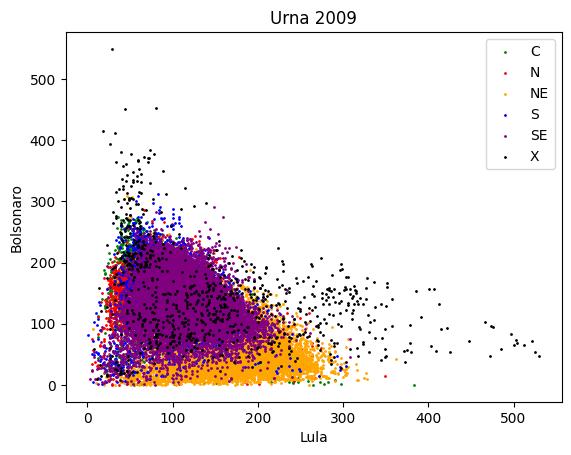

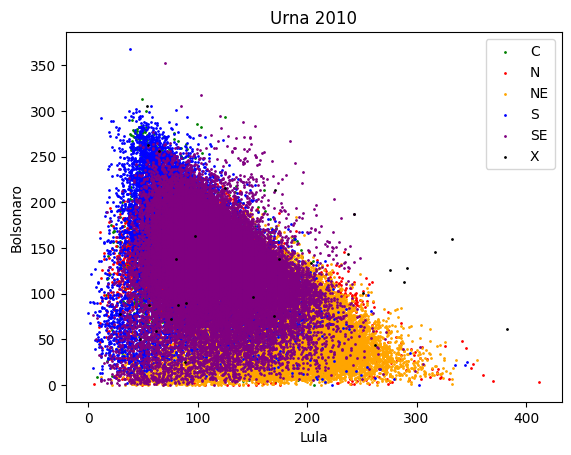

In [82]:


fig, ax = plt.subplots()
for key, group in df[df['LOG_MODELO']=='UE2009'].groupby('REGIAO'): group.plot(ax=ax, kind='scatter', x='T2QT13', y='T2QT22', label=key, color=colors_dict[key], s=1, xlabel='Lula', ylabel='Bolsonaro', title='Urna 2009')
fig, ax = plt.subplots()
for key, group in df[df['LOG_MODELO']=='UE2010'].groupby('REGIAO'): group.plot(ax=ax, kind='scatter', x='T2QT13', y='T2QT22', label=key, color=colors_dict[key], s=1, xlabel='Lula', ylabel='Bolsonaro', title='Urna 2010')

ValueError: 'c' argument has 43009 elements, which is inconsistent with 'x' and 'y' with size 26566.

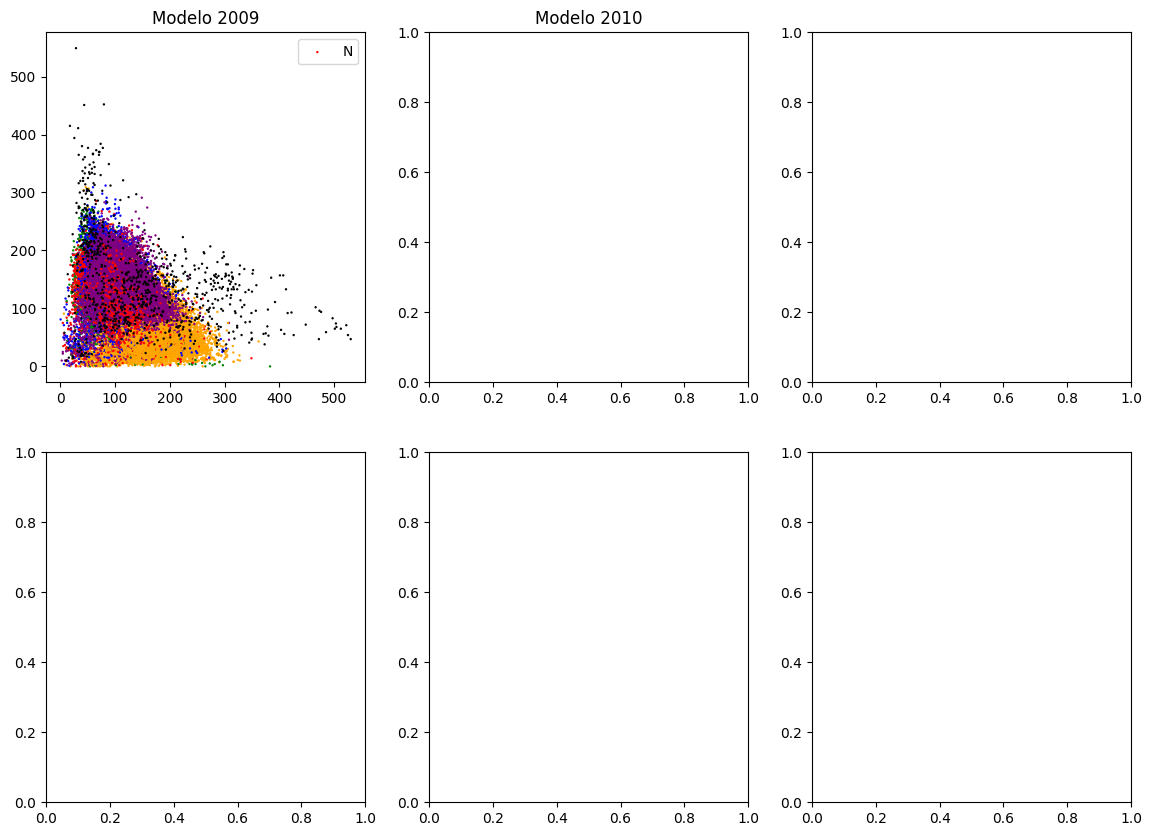

In [83]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(14, 10)

axs[0, 0].scatter(x_09, y_09, c=color_09.map(colors_dict), s=0.5)
axs[0, 0].set_title('Modelo 2009')
axs[0, 0].legend(colors_dict)

axs[0, 1].scatter(x_10, y_10, c=color_10.map(colors_dict), s=0.5)
axs[0, 1].set_title('Modelo 2010')
axs[0, 1].legend(colors_dict)

axs[0, 2].scatter(x_11, y_11, c=color_11.map(colors_dict), s=0.5)
axs[0, 2].set_title('Modelo 2011')
axs[0, 2].legend(colors_dict)

axs[1, 0].scatter(x_13, y_13, c=color_13.map(colors_dict), s=0.5)
axs[1, 0].set_title('Modelo 2013')
axs[1, 0].legend(colors_dict)

axs[1, 1].scatter(x_15, y_15, c=color_15.map(colors_dict), s=0.5)
axs[1, 1].set_title('Modelo 2015')
axs[1, 1].legend(colors_dict)

axs[1, 2].scatter(x_20, y_20, c=color_20.map(colors_dict), s=0.5)
axs[1, 2].set_title('Modelo 2020')
axs[1, 2].legend(colors_dict)

for ax in axs.flat:
    ax.set(xlabel='Lula', ylabel='Bolsonaro')

In [11]:
print(f"Numero total votos urna 2009: {df[df['LOG_MODELO']=='UE2009']['T2QTTOT'].sum():,}")
print(f"Numero total votos urna 2010: {df[df['LOG_MODELO']=='UE2010']['T2QTTOT'].sum():,}")
print(f"Numero total votos urna 2011: {df[df['LOG_MODELO']=='UE2011']['T2QTTOT'].sum():,}")
print(f"Numero total votos urna 2013: {df[df['LOG_MODELO']=='UE2013']['T2QTTOT'].sum():,}")
print(f"Numero total votos urna 2015: {df[df['LOG_MODELO']=='UE2015']['T2QTTOT'].sum():,}")
print(f"Numero total votos urna 2020: {df[df['LOG_MODELO']=='UE2020']['T2QTTOT'].sum():,}")

Numero total votos urna 2009: 10,859,105
Numero total votos urna 2010: 22,995,850
Numero total votos urna 2011: 6,605,506
Numero total votos urna 2013: 6,034,209
Numero total votos urna 2015: 21,645,124
Numero total votos urna 2020: 53,461,165


In [25]:
print("\n Urna 2009")
print(f"% LULA 2o Turno: {df[df['LOG_MODELO']=='UE2009']['T2QT13'].sum()/df[df['LOG_MODELO']=='UE2009']['T2QTTOT'].sum():.2f}")
print(f"% Bolsonaro 2o Turno: {df[df['LOG_MODELO']=='UE2009']['T2QT22'].sum()/df[df['LOG_MODELO']=='UE2009']['T2QTTOT'].sum():.2f}")
print(f"Total de urnas em capitais: {df[df['LOG_MODELO']=='UE2009']['FG_CAPITAL'].sum():,}")


print("\n Urna 2010")
print(f"% LULA 2o Turno: {df[df['LOG_MODELO']=='UE2010']['T2QT13'].sum()/df[df['LOG_MODELO']=='UE2010']['T2QTTOT'].sum():.2f}")
print(f"% Bolsonaro 2o Turno: {df[df['LOG_MODELO']=='UE2010']['T2QT22'].sum()/df[df['LOG_MODELO']=='UE2010']['T2QTTOT'].sum():.2f}")
print(f"Total de urnas em capitais: {df[df['LOG_MODELO']=='UE2010']['FG_CAPITAL'].sum():,}")

print("\n Urna 2011")
print(f"% LULA 2o Turno: {df[df['LOG_MODELO']=='UE2011']['T2QT13'].sum()/df[df['LOG_MODELO']=='UE2011']['T2QTTOT'].sum():.2f}")
print(f"% Bolsonaro 2o Turno: {df[df['LOG_MODELO']=='UE2011']['T2QT22'].sum()/df[df['LOG_MODELO']=='UE2011']['T2QTTOT'].sum():.2f}")
print(f"Total de urnas em capitais: {df[df['LOG_MODELO']=='UE2011']['FG_CAPITAL'].sum():,}")

print("\nUrna 2013")
print(f"% LULA 2o Turno: {df[df['LOG_MODELO']=='UE2013']['T2QT13'].sum()/df[df['LOG_MODELO']=='UE2013']['T2QTTOT'].sum():.2f}")
print(f"% Bolsonaro 2o Turno: {df[df['LOG_MODELO']=='UE2013']['T2QT22'].sum()/df[df['LOG_MODELO']=='UE2013']['T2QTTOT'].sum():.2f}")
print(f"Total de urnas em capitais: {df[df['LOG_MODELO']=='UE2013']['FG_CAPITAL'].sum():,}")

print("\nUrna 2015")
print(f"% LULA 2o Turno: {df[df['LOG_MODELO']=='UE2015']['T2QT13'].sum()/df[df['LOG_MODELO']=='UE2015']['T2QTTOT'].sum():.2f}")
print(f"% Bolsonaro 2o Turno: {df[df['LOG_MODELO']=='UE2015']['T2QT22'].sum()/df[df['LOG_MODELO']=='UE2015']['T2QTTOT'].sum():.2f}")
print(f"Total de urnas em capitais: {df[df['LOG_MODELO']=='UE2015']['FG_CAPITAL'].sum():,}")

print("\nUrna 2020")
print(f"% LULA 2o Turno: {df[df['LOG_MODELO']=='UE2020']['T2QT13'].sum()/df[df['LOG_MODELO']=='UE2020']['T2QTTOT'].sum():.2f}")
print(f"% Bolsonaro 2o Turno: {df[df['LOG_MODELO']=='UE2020']['T2QT22'].sum()/df[df['LOG_MODELO']=='UE2020']['T2QTTOT'].sum():.2f}")
print(f"% Diferenca pro Bolsonaro: {df[df['LOG_MODELO']=='UE2020']['T2QT22'].sum()-df[df['LOG_MODELO']=='UE2020']['T2QT13'].sum():,}")
print(f"Total de urnas em capitais: {df[df['LOG_MODELO']=='UE2020']['FG_CAPITAL'].sum():,}")
print(f"% Distribuicao em regioes: Sul - {df[df['REGIAO']=='S']['T2QT22'].sum()/df[df['LOG_MODELO']=='UE2020']['T2QTTOT'].sum():.2f}, Sudeste - {df[df['REGIAO']=='SE']['T2QT22'].sum()/df[df['LOG_MODELO']=='UE2020']['T2QTTOT'].sum():.2f}, Norte - {df[df['REGIAO']=='N']['T2QT22'].sum()/df[df['LOG_MODELO']=='UE2020']['T2QTTOT'].sum():.2f}, Nordeste - {df[df['REGIAO']=='NE']['T2QT22'].sum()/df[df['LOG_MODELO']=='UE2020']['T2QTTOT'].sum():.2f}, Centro-Oeste - {df[df['REGIAO']=='C']['T2QT22'].sum()/df[df['LOG_MODELO']=='UE2020']['T2QTTOT'].sum():.2f}")




 Urna 2009
% LULA 2o Turno: 0.49
% Bolsonaro 2o Turno: 0.47
Total de urnas em capitais: 2,422

 Urna 2010
% LULA 2o Turno: 0.51
% Bolsonaro 2o Turno: 0.44
Total de urnas em capitais: 5,869

 Urna 2011
% LULA 2o Turno: 0.51
% Bolsonaro 2o Turno: 0.44
Total de urnas em capitais: 1,910

Urna 2013
% LULA 2o Turno: 0.49
% Bolsonaro 2o Turno: 0.47
Total de urnas em capitais: 1,555

Urna 2015
% LULA 2o Turno: 0.49
% Bolsonaro 2o Turno: 0.46
Total de urnas em capitais: 7,762

Urna 2020
% LULA 2o Turno: 0.47
% Bolsonaro 2o Turno: 0.49
% Diferenca pro Bolsonaro: 1,064,250
Total de urnas em capitais: 78,132
% Distribuicao em regioes: Sul - 0.20, Sudeste - 0.51, Norte - 0.09, Nordeste - 0.19, Centro-Oeste - 0.10


In [21]:
df['REGIAO'].unique()

array(['N', 'NE', 'C', 'SE', 'S', 'X'], dtype=object)